In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [14]:

# Load the dataset into a DataFrame
df = pd.read_csv('gender_classification.csv')



In [15]:
# Find missing values and treat them
imputer = SimpleImputer(strategy='mean')
df[['forehead_width_cm', 'forehead_height_cm']] = imputer.fit_transform(df[['forehead_width_cm', 'forehead_height_cm']])



In [16]:
# Observe distribution of target variable
print(df['gender'].value_counts())



gender
Female    2501
Male      2500
Name: count, dtype: int64


In [17]:
# Standardization on continuous data
scaler = StandardScaler()
df[['forehead_width_cm', 'forehead_height_cm']] = scaler.fit_transform(df[['forehead_width_cm', 'forehead_height_cm']])



In [18]:
# Encode the target variable into binary labels
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])



In [19]:
# Extract independent and dependent variables
X = df.drop('gender', axis=1)
y = df['gender']



In [25]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Accuracy Score for GradientBoostingClassifier: 0.9673550966022652



Confusion matrix for GradientBoostingClassifier


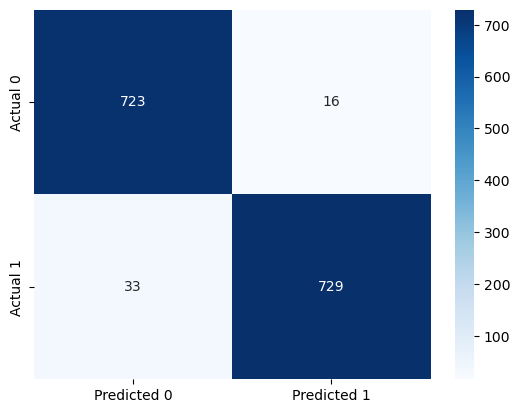



 Classification report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       739
           1       0.98      0.96      0.97       762

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [26]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Print accuracy, confusion matrix, and classification report for GradientBoostingClassifier
print("Accuracy Score for GradientBoostingClassifier:", accuracy_score(y_test, gb_pred))
print('\n\n')
print('Confusion matrix for GradientBoostingClassifier')
gb_cm = confusion_matrix(y_test, gb_pred)

lbl1 = ["Predicted 0", "Predicted 1"]  # Assuming binary classification
lbl2 = ["Actual 0", "Actual 1"]  # Assuming binary classification

sns.heatmap(gb_cm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('\n\n Classification report')
print(classification_report(y_test, gb_pred))

Accuracy Score: 0.960692871419054



Confusion matrix for XGBoost classifier


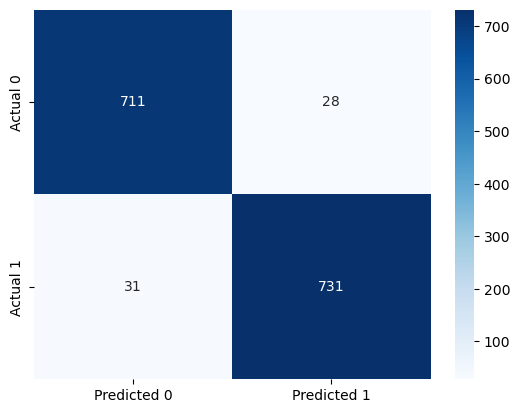



 Classification report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       739
           1       0.96      0.96      0.96       762

    accuracy                           0.96      1501
   macro avg       0.96      0.96      0.96      1501
weighted avg       0.96      0.96      0.96      1501



In [28]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgboost_pred = xgb_model.predict(X_test)

# Print accuracy, confusion matrix, and classification report
print("Accuracy Score:", accuracy_score(y_test, xgboost_pred))
print('\n\n')
print('Confusion matrix for XGBoost classifier')
xgboost_cm = confusion_matrix(y_test, xgboost_pred)

lbl1 = ["Predicted 0", "Predicted 1"]  # Assuming binary classification
lbl2 = ["Actual 0", "Actual 1"]  # Assuming binary classification

sns.heatmap(xgboost_cm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('\n\n Classification report')
print(classification_report(y_test, xgboost_pred))
